In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt 


Khai báo tham số

In [69]:
K_To=1
Ha=37000
R=8.314472
To=298.15
Hd=220000
S=710
RES=2.5

Công thức 23

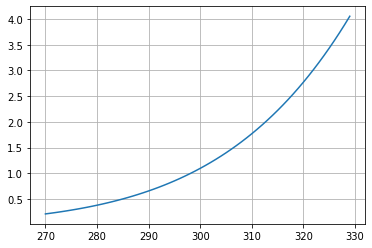

In [70]:
Temp=[x for x in np.arange(270,330,1)]
def K(T):
    return K_To*math.exp(-(Ha/R)*(1/T-1/To))
Reaction_rate=[K(x) for x in Temp]
plt.plot(Temp,Reaction_rate)
plt.grid()
plt.show()

Công thức 24

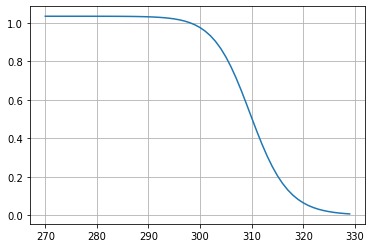

In [71]:

def f(T):
    tuso=1+math.exp(-(Hd/R)*(1/To-1/(Hd/S)))
    mauso=1+math.exp(-(Hd/R)*(1/T-1/(Hd/S)))
    return tuso/mauso
Enzyme_activity_rate=[f(x) for x in Temp]
plt.plot(Temp,Enzyme_activity_rate)
plt.grid()
plt.show()

Công thức 25

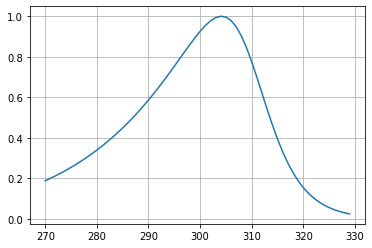

1.1481196172542312


In [72]:

def PMax(T):
    return float(K(T)*f(T))
Potential_photosynthesis_rate=[PMax(x) for x in Temp]
MAX_Photosynthesis_rate=max(Potential_photosynthesis_rate)
Potential_photosynthesis_rate=[x/MAX_Photosynthesis_rate for x in Potential_photosynthesis_rate]
plt.plot(Temp,Potential_photosynthesis_rate)
plt.grid()
plt.show()
print(PMax(273+30))
#print(MAX_Photosynthesis_rate)

Nghiệm của phương trình (22)

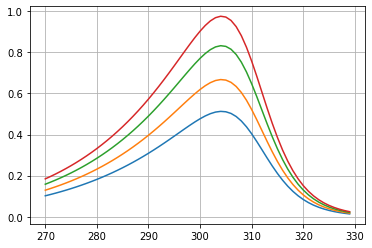

In [73]:
def P(CO2_air,T):
    kq=((CO2_air+k+RES*PMax(T))-((CO2_air+k+RES*PMax(T))**2-4*RES*CO2_air*PMax(T))**(0.5))/(2*RES)
    
    return kq
Photosynthesis_rate_with_any_CO2Air=[P(12,x) for x in Temp]
Photosynthesis_rate_with_any_CO2Air=[x/MAX_Photosynthesis_rate for x in Photosynthesis_rate_with_any_CO2Air]
plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)

Photosynthesis_rate_with_any_CO2Air=[P(22,x) for x in Temp]
Photosynthesis_rate_with_any_CO2Air=[x/MAX_Photosynthesis_rate for x in Photosynthesis_rate_with_any_CO2Air]
plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)

Photosynthesis_rate_with_any_CO2Air=[P(52,x) for x in Temp]
Photosynthesis_rate_with_any_CO2Air=[x/MAX_Photosynthesis_rate for x in Photosynthesis_rate_with_any_CO2Air]
plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)

Photosynthesis_rate_with_any_CO2Air=[P(402,x) for x in Temp]
Photosynthesis_rate_with_any_CO2Air=[x/MAX_Photosynthesis_rate for x in Photosynthesis_rate_with_any_CO2Air]
plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)
plt.grid()
plt.show()

In [74]:
'''
t_GH=0.78
n_GlobPar=0.5
ro_Can=0.07
ro_Flr=0.5
K1=0.7
K2=0.7
def PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,Iglob,LAI):
    PAR_GH=t_GH*n_GlobPar*Iglob
    return PAR_GH*(1-ro_Can)*(1-np.exp(-K1*LAI))+ro_Flr*PAR_GH*(1-ro_Can)*np.exp(-K1*LAI)*(1-np.exp(-K2*LAI))
ArrLAI=[x for x in np.arange(1,11,1)]
#print(PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,1,1.0))
PAR_absorbed_by_canopy=[PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,0.546,i) for i in ArrLAI]
print(PAR_absorbed_by_canopy[-1])
plt.plot(ArrLAI,PAR_absorbed_by_canopy)
plt.grid()
plt.show()
#0.44854
'''

'\nt_GH=0.78\nn_GlobPar=0.5\nro_Can=0.07\nro_Flr=0.5\nK1=0.7\nK2=0.7\ndef PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,Iglob,LAI):\n    PAR_GH=t_GH*n_GlobPar*Iglob\n    return PAR_GH*(1-ro_Can)*(1-np.exp(-K1*LAI))+ro_Flr*PAR_GH*(1-ro_Can)*np.exp(-K1*LAI)*(1-np.exp(-K2*LAI))\nArrLAI=[x for x in np.arange(1,11,1)]\n#print(PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,1,1.0))\nPAR_absorbed_by_canopy=[PARCan(t_GH,n_GlobPar,ro_Can,ro_Flr,K1,K2,0.546,i) for i in ArrLAI]\nprint(PAR_absorbed_by_canopy[-1])\nplt.plot(ArrLAI,PAR_absorbed_by_canopy)\nplt.grid()\nplt.show()\n#0.44854\n'

Có dùng LAI

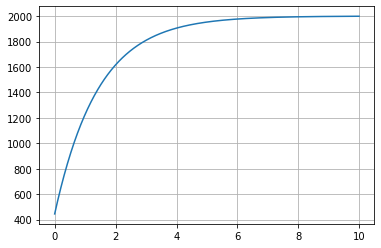

In [75]:
Lo=2000
def L(Lo,Kconst,LAI,m):
    return Lo*(1-(Kconst*np.exp(-Kconst*LAI))/(1-m))
ArrLAI=[i for i in np.arange(0,10,0.01)]
PAR_absorbed_by_canopy=[L(Lo,0.7,i,0.1) for i in ArrLAI]
plt.plot(ArrLAI,PAR_absorbed_by_canopy)
plt.grid()
plt.show()


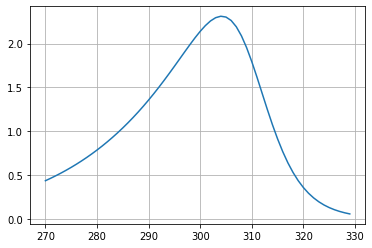

In [78]:
K_To=1
To=298.15
Ha=37000
R=8.314472
Hd=220000
S=710
RES=200#200
KL=500 #406.5
Lo=2000 #545.45
Kconst=1
m=0.1
Km=700 #20000
P_MLT=50 #35

def K(T):
    return K_To*math.exp(-Ha/R*(1/T-1/To))

def f(T):
    tuso=1+math.exp(-Hd/R*(1/To-1/(Hd/S)))
    mauso=1+math.exp(-Hd/R*(1/T-1/(Hd/S)))
    return tuso/mauso

def L(Lo,Kconst,LAI,m):
    return Lo*(1-(Kconst*np.exp(-Kconst*LAI))/(1-m))

def K_new(LAI,Tem):
    return LAI*float(K(Tem))

def PMax_New(LAI,Tem):
    return float(K_new(LAI,Tem)*f(Tem))
ARR_PMAX=[PMax_New(1,x)/PMax_New(1,304) for x in Temp ]
plt.plot(Temp,ARR_PMAX)
plt.grid()
#print(L(Lo,K,LAI,m))
def PMaxForMultipleLeaves(LAI,T):
    tuso=float(P_MLT)
    tuso*=float(PMax_New(LAI,T))/PMax_New(LAI,304)
    tuso*=L(Lo,Kconst,LAI,m)
    mauso=L(Lo,Kconst,LAI,m)
    mauso+=KL
    return (tuso/mauso)


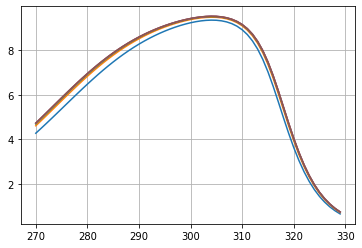

In [77]:
def P_New(LAI,CO2_air,T):
    #kq=((CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T))-((CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T))**2-4*RES*CO2_air*PMaxForMultipleLeaves(LAI,T))**(0.5))/(2*RES)
    component1=CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T)
    component2=((CO2_air+Km+RES*PMaxForMultipleLeaves(LAI,T))**2-4*CO2_air*RES*PMaxForMultipleLeaves(LAI,T))**(1/2)
    return (component1-component2)/(2*RES)
for i in range(1,7):
    Photosynthesis_rate_with_any_CO2Air=[P_New(i,2126,x) for x in Temp]
    plt.plot(Temp,Photosynthesis_rate_with_any_CO2Air)
plt.grid()
plt.show()
